#**Dataset information**

# Regression task

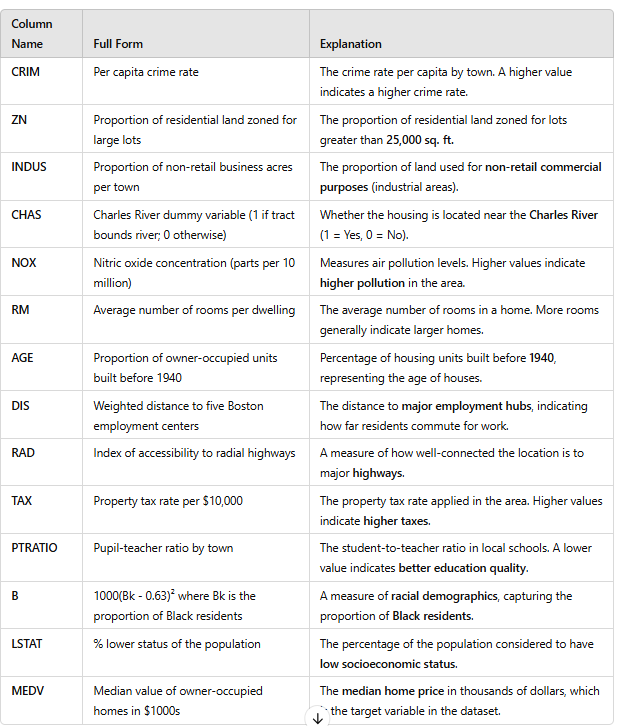

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]


In [6]:
try:
    df = pd.read_csv(url, header=None, delim_whitespace=True, names=column_names)
except:
    print("Error loading data. Check internet connection or URL.")
    exit()

<ipython-input-6-ee29cf10f485>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, header=None, delim_whitespace=True, names=column_names)


In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [9]:
df.shape

(506, 14)

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [12]:
df.isnull().sum().sum()

0

In [13]:
# Split data into features and target
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input

In [17]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [18]:

# Define the model
model = Sequential()

# Add an input layer
model.add(Input(shape=(13,)))

# Add hidden layers
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))


# Add output layer
model.add(Dense(1, activation='linear'))

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:

# Compile model (same as above)
model.compile(optimizer='Adam',loss='mse',metrics=['mae'])

In [21]:
print(X_train.shape)
print(y_train.shape)

(404, 13)
(404,)


In [22]:
# Train the model
history = model.fit(X_train, y_train, batch_size=50, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 226ms/step - loss: 542.1935 - mae: 21.2473 - val_loss: 479.1592 - val_mae: 20.2427
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 530.3342 - mae: 20.9078 - val_loss: 451.2187 - val_mae: 19.5479
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 483.7550 - mae: 19.9682 - val_loss: 425.2032 - val_mae: 18.8797
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 490.5114 - mae: 19.9582 - val_loss: 401.1636 - val_mae: 18.2429
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 437.9989 - mae: 18.8059 - val_loss: 379.4266 - val_mae: 17.6487
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 416.5098 - mae: 18.3026 - val_loss: 359.5729 - val_mae: 17.0890
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 397.8409 - mae: 17.5419 - val_loss: 341.6980 - val_mae: 16.5684
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 386.8159 - mae: 17.2532 - val_loss: 325.4204 - val_mae: 16.0800
Epoch 9/100
7/7 ━━━━━━━

In [23]:
model.layers[0].get_weights()

[array([[-1.94403931e-01, -2.53359050e-01, -4.82093841e-01,
         -2.79009908e-01, -5.25286198e-01, -4.85101700e-01,
         -2.67004281e-01, -4.73396689e-01, -2.48945549e-01,
         -4.60493416e-01, -2.50252187e-01, -4.15569067e-01,
         -1.44958958e-01, -4.53446358e-01, -2.80411929e-01,
         -3.99408758e-01, -4.02562082e-01, -2.22192720e-01,
         -4.72388923e-01, -2.48644516e-01, -4.17854905e-01,
         -4.32534754e-01, -5.38041830e-01, -1.87655076e-01,
         -1.65817872e-01, -5.44915557e-01, -2.78332680e-01,
         -4.93666291e-01, -2.82533884e-01, -2.94422328e-01,
         -3.71619821e-01, -1.10996336e-01, -3.09422731e-01,
         -4.91886795e-01, -2.78725535e-01, -4.03136581e-01,
         -4.12367314e-01, -5.58735728e-01, -2.43082196e-01,
         -1.09104477e-01, -3.38837892e-01, -2.25124359e-01,
         -1.86992690e-01, -3.69876683e-01, -2.24504769e-01,
         -1.68044448e-01, -3.23806554e-01, -6.05027497e-01,
         -2.13842332e-01, -5.42529225e-0

In [24]:
model.layers[1].get_weights()

[array([[ 0.01601955,  0.21161148, -0.03680896, ..., -0.02015301,
          0.19898596,  0.16128728],
        [-0.05458153,  0.26249662, -0.0778854 , ..., -0.2629809 ,
          0.05447046,  0.03598495],
        [ 0.08982261, -0.02126857, -0.07083632, ..., -0.20117219,
          0.1608275 , -0.04291931],
        ...,
        [ 0.14033014,  0.2683396 ,  0.14154644, ..., -0.24971116,
         -0.0951464 , -0.10029608],
        [ 0.11866521,  0.10629121, -0.02687095, ...,  0.12319493,
         -0.05912643,  0.13738279],
        [ 0.27874467,  0.24634139,  0.12764262, ..., -0.00169797,
          0.27431223,  0.2319968 ]], dtype=float32),
 array([ 0.06201196, -0.01752008, -0.07435685, -0.05965564, -0.09287655,
         0.03519739, -0.03581311, -0.06672917, -0.08142014,  0.05500792,
        -0.07980713, -0.02412756, -0.06940785,  0.04242005, -0.00742121,
        -0.06693726, -0.07144804,  0.00171477, -0.07144811,  0.03609688,
         0.04060469, -0.09998211, -0.05976191, -0.08620632,  0.052

In [25]:
# Evaluate on Test Set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - loss: 44.1897 - mae: 4.4558
Test MAE: 4.5985


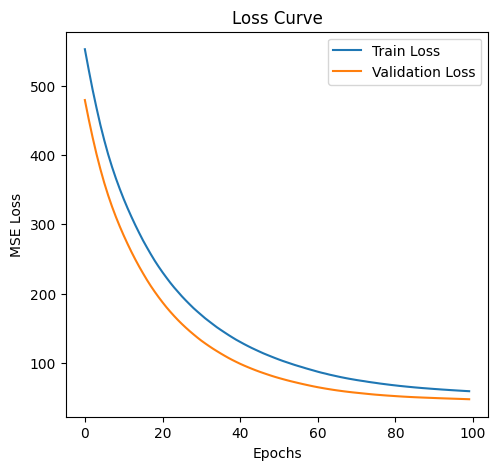

In [26]:
plt.figure(figsize=(12, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Loss Curve')
plt.legend()

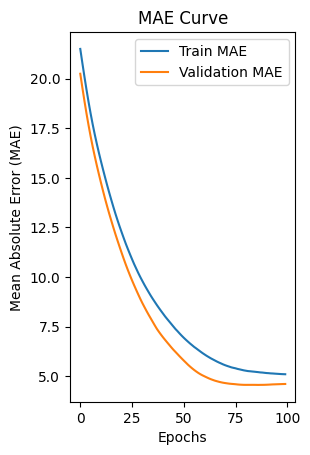

In [27]:
# MAE Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Curve')
plt.legend()

plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[24.653412]
 [24.764648]
 [17.190485]
 [24.735878]
 [17.105682]
 [24.453632]
 [23.481974]
 [16.55641 ]
 [21.769142]
 [23.528076]
 [24.32268 ]
 [24.476057]
 [11.92298 ]
 [24.570753]
 [24.395649]
 [22.466667]
 [20.28261 ]
 [12.687511]
 [24.769737]
 [15.911344]
 [24.74111 ]
 [24.747147]
 [20.708403]
 [24.258434]
 [15.842374]
 [16.407612]
 [24.648409]
 [13.515363]
 [24.442238]
 [23.631987]
 [24.31184 ]
 [24.681177]
 [17.823732]
 [17.469416]
 [16.463327]
 [16.802359]
 [24.742956]
 [24.621618]
 [24.641039]
 [24.72869 ]
 [21.510893]
 [24.729208]
 [24.769678]
 [24.675354]
 [24.68624 ]
 [16.1023  ]
 [21.842264]
 [24.736576]
 [20.062096]
 [24.742147]
 [24.60948 ]
 [24.76225 ]
 [22.786295]
 [24.537062]
 [24.756987]
 [23.26675 ]
 [16.513819]
 [24.762583]
 [24.71264 ]
 [24.44893 ]
 [24.732525]
 [24.768106]
 [24.739862]
 [23.93107 ]
 [24.761374]
 [23.625418]
 [16.731813]
 [24.74393 ]
 [24.762829]
 [13.490541]
 [24.657022]
 [23.690905]
 [13.067933]
 [24.755522]


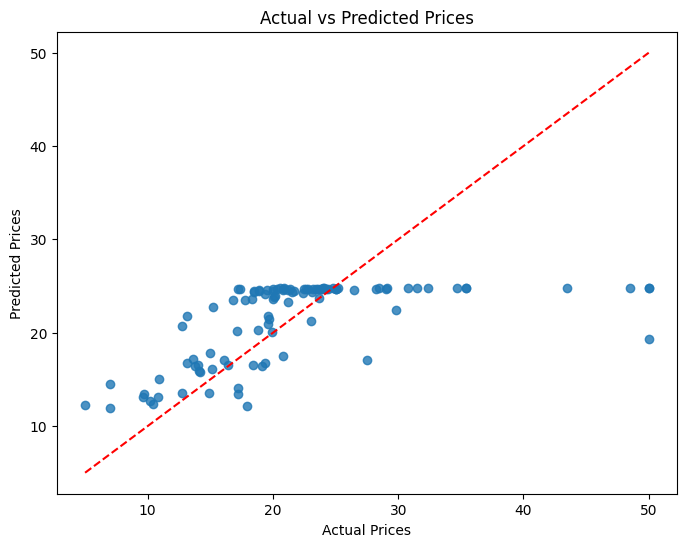

In [28]:
# Predict on Test Data
y_pred = model.predict(X_test)

print(y_pred)

# Compare Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.8)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')  # Perfect Fit Line
plt.show()


In [29]:

import time
import os
def saveModel_path(model_dir="/content/SAVED_MODELS/"):
  os.makedirs(model_dir, exist_ok=True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(model_dir, fileName)
  print(f"your model will be saved at the following location\n{model_path}")
  return model_path



In [30]:
model.save(saveModel_path())

your model will be saved at the following location
/content/SAVED_MODELS/Model_2025_02_10_08_21_05_.h5


In [31]:

history.params

{'verbose': 1, 'epochs': 100, 'steps': 7}

In [32]:

pd.DataFrame(history.history)

,loss,mae,val_loss,val_mae
0,552.512878,21.492662,479.159241,20.242666
1,522.633484,20.787567,451.218658,19.547892
2,493.978821,20.100861,425.203186,18.879702
3,467.843445,19.442787,401.163635,18.242878
4,443.176910,18.820324,379.426636,17.648678
...,...,...,...,...
95,60.392540,5.126795,48.231930,4.599842
96,60.039188,5.119550,48.045639,4.603344
97,59.703831,5.112668,47.864983,4.607713
98,59.369408,5.108019,47.671814,4.611167
